## From Previous Lab

* Import the necessary libraries if you are starting a new notebook.

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

* Load the continuous and discrete variables into continuous_df and discrete_df variables.

In [2]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
# apply operations from the previous lab
customer_df.columns = [i.lower().replace(' ', '_') for i in customer_df.columns]
customer_df = customer_df.rename(columns = {'employmentstatus' : 'employment_status'})
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df['income'] = customer_df['income'].replace(0, round(np.mean(customer_df['income'])))
customer_df.set_index('customer', inplace = True)
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,37657,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,37657,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
def split_to_types(x):
    continuous = []
    discrete = []
    categorical = []
    for col in x:
        if x[col].dtype == np.object:
            categorical.append(col)
        else:
            if x[col].nunique() > 250:
                continuous.append(col)
            else:
                discrete.append(col)
    return x[continuous], x[discrete], x[categorical]

In [5]:
continuous_df, discrete_df, categorical = split_to_types(customer_df)

* Plot a correlation matrix, what can you see?

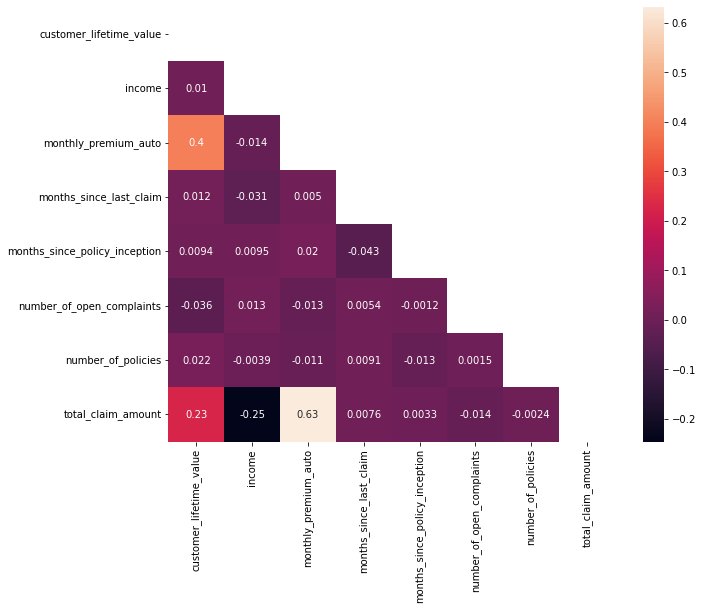

In [6]:
corr_matrix = customer_df.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.show()
# there is relatively high correlation between monthly_premium_auto and 
# total_claim_amount (also with customer_lifetime_value)

* Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).
* What can you see in the plots?

In [7]:
# don't need effective_to_date column for plot
discrete_df.drop('effective_to_date', axis = 1, inplace = True)

MONTHLY_PREMIUM_AUTO:


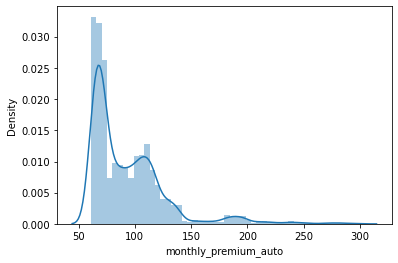

MONTHS_SINCE_LAST_CLAIM:


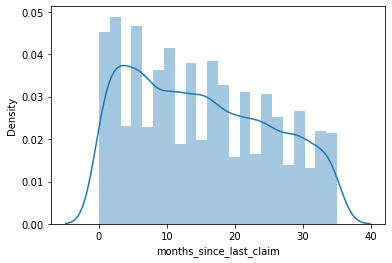

MONTHS_SINCE_POLICY_INCEPTION:


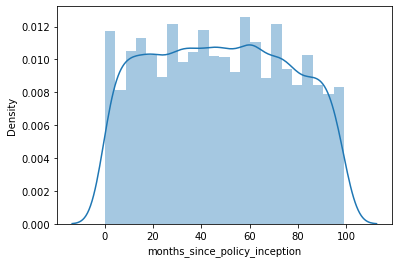

NUMBER_OF_OPEN_COMPLAINTS:


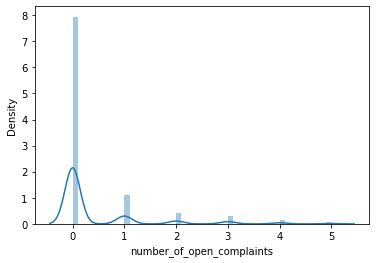

NUMBER_OF_POLICIES:


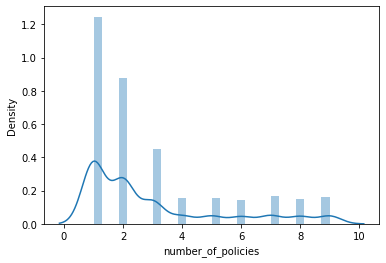

In [8]:
def plot(x):
    for col in x:
        print(f'{col.upper()}:')
        sns.distplot(x[col])
        plt.show()
plot(discrete_df)
# are not normally distributed

CUSTOMER_LIFETIME_VALUE:


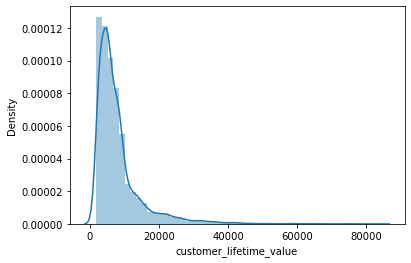

INCOME:


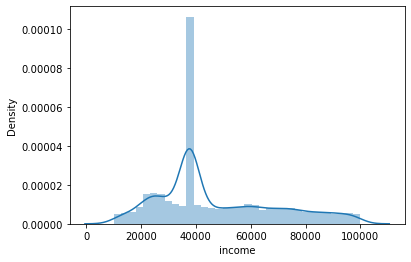

TOTAL_CLAIM_AMOUNT:


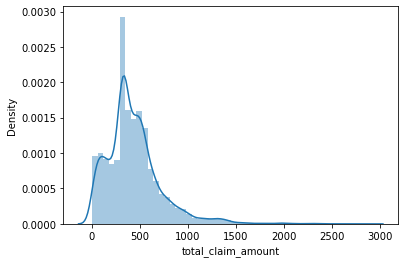

In [9]:
plot(continuous_df)
# are not normal and have outliers

* Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.
* Have you found outliers? If you have, what should we do with them?

## Lab | Feature extraction

* Open the categoricals variable we created before.

In [10]:
categorical.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


* Plot all the categorical variables with the proper plot. What can you see?
* There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

The categorical columns are:  ['state', 'response', 'coverage', 'education', 'employment_status', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size']

Frequency analysis of column: STATE


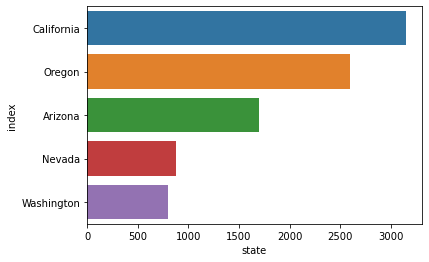

Frequency analysis of column: RESPONSE


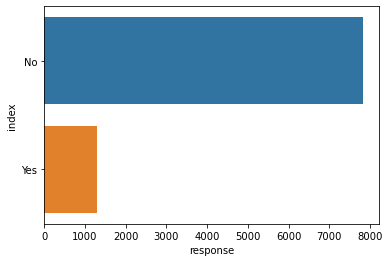

Frequency analysis of column: COVERAGE


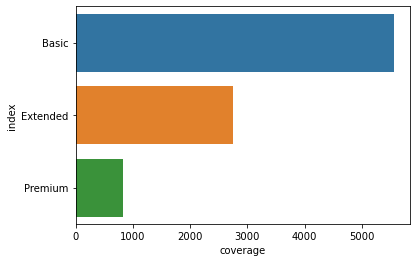

Frequency analysis of column: EDUCATION


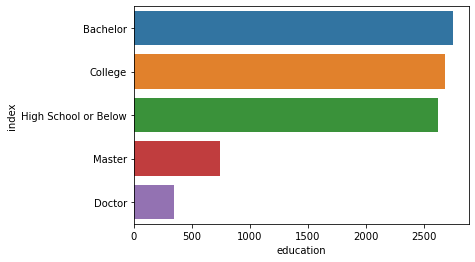

Frequency analysis of column: EMPLOYMENT_STATUS


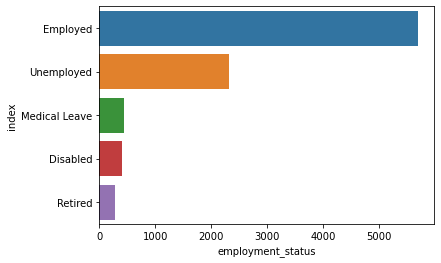

Frequency analysis of column: GENDER


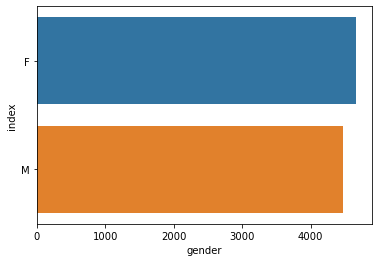

Frequency analysis of column: LOCATION_CODE


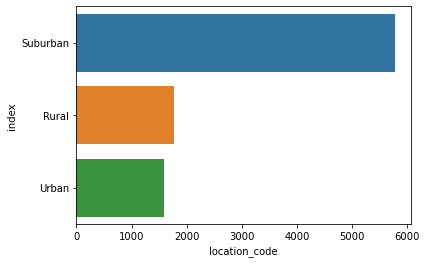

Frequency analysis of column: MARITAL_STATUS


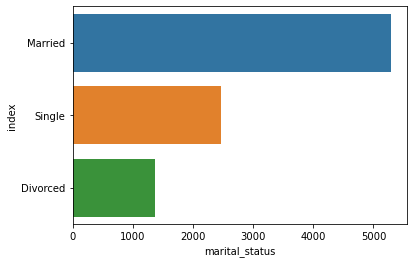

Frequency analysis of column: POLICY_TYPE


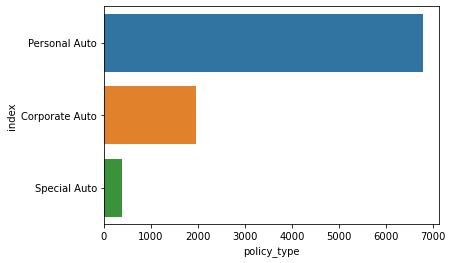

Frequency analysis of column: POLICY


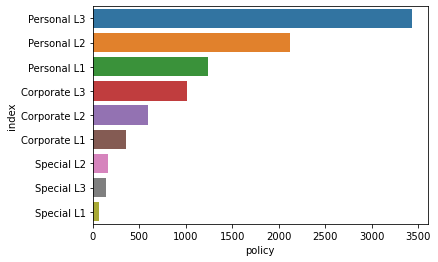

Frequency analysis of column: RENEW_OFFER_TYPE


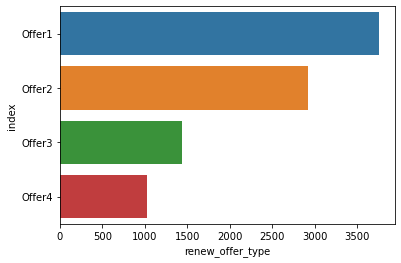

Frequency analysis of column: SALES_CHANNEL


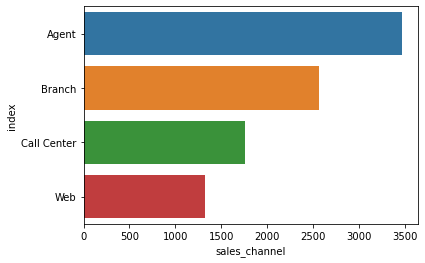

Frequency analysis of column: VEHICLE_CLASS


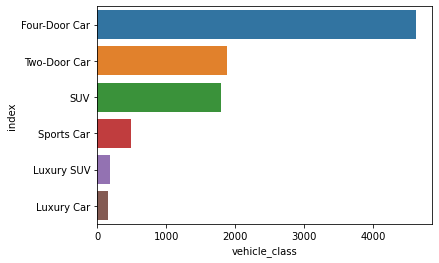

Frequency analysis of column: VEHICLE_SIZE


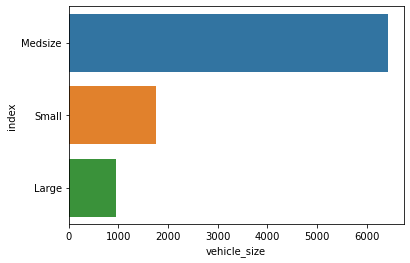

In [11]:
columns = list(categorical.columns)
print("The categorical columns are: ",columns)
print()
for col in columns:
    cat_plot = categorical[col].value_counts().reset_index()
    sns.barplot(x=col, y="index", data = cat_plot)
    print("Frequency analysis of column:",col.upper())
    plt.show()
#from the plots we see that all values are unique and there are no empty or NaN values

In [12]:
#let's check the values of policy_type and policy with crosstab and make sure the namings match
pd.crosstab(categorical.policy_type, categorical.policy)

policy,Corporate L1,Corporate L2,Corporate L3,Personal L1,Personal L2,Personal L3,Special L1,Special L2,Special L3
policy_type,,,,,,,,,
Corporate Auto,359,595,1014,0,0,0,0,0,0
Personal Auto,0,0,0,1240,2122,3426,0,0,0
Special Auto,0,0,0,0,0,0,66,164,148


In [13]:
#as they match, I decided to leave the one with extra information (L1, L2, L3) and drop the policy_type column
categorical.drop('policy_type', axis = 1, inplace = True)

* Plot time variable. Can you extract something from it?

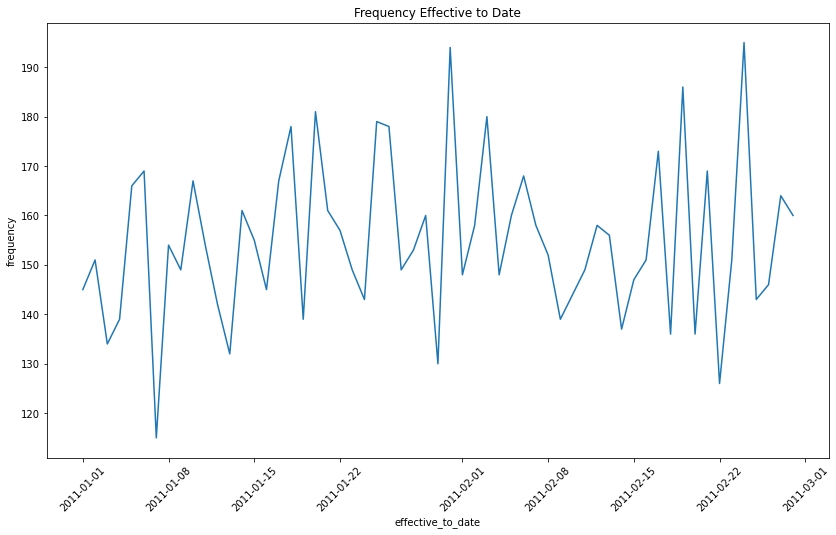

In [14]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.lineplot(x = customer_df['effective_to_date'].unique(), y = customer_df['effective_to_date'].value_counts())
ax.set_title('Frequency Effective to Date')
ax.set_xlabel('effective_to_date')
ax.set_ylabel('frequency')
plt.xticks(rotation = 45)
plt.show()

In [15]:
#as they belong to one year, I decided to group them by week of the year
customer_df['effective_to_week'] = customer_df['effective_to_date'].dt.weekofyear
customer_df['effective_to_week'].unique()

array([ 8,  5,  7,  3,  4,  1,  2,  9,  6, 52])

In [17]:
#correct the week from the previous year (change 52 to 1)
customer_df['effective_to_week'] = np.where(customer_df['effective_to_week'] == 52, 1, customer_df['effective_to_week'])
customer_df['effective_to_week'].unique()

array([8, 5, 7, 3, 4, 1, 2, 9, 6])

In [18]:
#drop effective_to_date
customer_df.drop('effective_to_date', axis = 1, inplace = True)

In [19]:
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_to_week
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,8
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,37657,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,5
AI49188,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,7
WW63253,California,7645.861827,No,Basic,Bachelor,Unemployed,M,37657,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,3
HB64268,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,5
